<a href="https://colab.research.google.com/github/uss96/StudyGroup/blob/master/%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_(%EA%B0%95%EC%9D%98)%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사하강법 (Gradient Descent)

기본 개념은 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜서 극값에 이를 때까지 반복시키는 것입니다.

**비용 함수 (Cost Function 혹은 Loss Function)를 최소화**하기 위해 반복해서 파라미터를 업데이트 해 나가는 방식입니다.

In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

Image(url='https://img.pngio.com/scikit-learn-batch-gradient-descent-versus-stochastic-gradient-descent-png-592_319.png')

## 샘플에 활용할 데이터 셋 만들기

In [ ]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=15)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

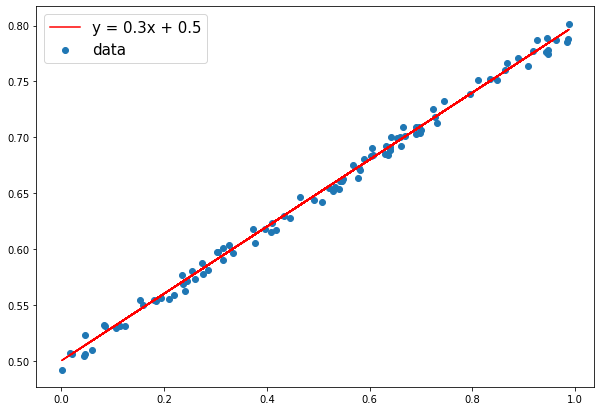

w: 0.3, b: 0.5


In [ ]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

## 초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의

w, b 값에 대하여 random한 초기 값을 설정해 줍니다.

In [ ]:
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)
w, b

(0.19435519134438972, 0.5373492853700982)

`y_hat`은 `prediction`은 값 입니다. 즉, 가설함수에서 실제 값 (y)를 뺀 함수를 정의합니다.

In [ ]:
# 코드를 입력해 주세요
y_hat = w*x + b

## 오차(Error) 정의

Loss Function 혹은 Cost Function을 정의 합니다.

Loss (Cost) Function은 예측값인 `y_hat`과 `y`의 차이에 **제곱의 평균**으로 정의합니다.

제곱은 오차에 대한 음수 값을 허용하지 않으며, 이는 **Mean Squared Error(MSE)**인 평균 제곱 오차 평가 지표와 관련 있습니다.

In [ ]:
# 코드를 입력해 주세요
error = ((y_hat - y)**2).mean()

## 학습률 (Learning Rate)

In [ ]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png', width = 650)

한 번 학습할 때 **얼마만큼 가중치(weight)를 업데이트** 해야 하는지 학습 양을 의미합니다.

너무 큰 학습률 (Learning Rate)은 가중치 갱신이 크게 되어 **자칫 Error가 수렴하지 못하고 발산**할 수 있으며,

너무 작은 학습률은 가중치 갱신이 작게 되어 **가중치 갱신이 충분히 되지 않고, 학습이 끝나** 버릴 수 있습니다. 즉 과소 적합되어 있는 상태로 남아 있을 수 있습니다.



## Gradient Descent 구현 (단항식)

In [ ]:
# 최대 반복 횟수
num_epoch = 500

# 학습율 (learning_rate)
learning_rate = 0.5

In [ ]:
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # 코드를 입력해 주세요
    y_hat = w*x + b

    # 코드를 입력해 주세요
    error = ((y_hat - y)**2).mean()
    if error < 0.00005:
        break

    # 코드를 입력해 주세요
    w = w - learning_rate * ((y_hat - y)*x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.65615, b = 0.36445 error = 0.03307
 5 w = 0.58571, b = 0.34589 error = 0.00670
10 w = 0.54529, b = 0.36725 error = 0.00494
15 w = 0.51071, b = 0.38584 error = 0.00365
20 w = 0.48104, b = 0.40179 error = 0.00270
25 w = 0.45556, b = 0.41549 error = 0.00200
30 w = 0.43369, b = 0.42724 error = 0.00148
35 w = 0.41492, b = 0.43734 error = 0.00110
40 w = 0.39880, b = 0.44600 error = 0.00082
45 w = 0.38496, b = 0.45344 error = 0.00061
50 w = 0.37309, b = 0.45982 error = 0.00046
55 w = 0.36289, b = 0.46530 error = 0.00035
60 w = 0.35414, b = 0.47001 error = 0.00026
65 w = 0.34662, b = 0.47405 error = 0.00020
70 w = 0.34017, b = 0.47752 error = 0.00016
75 w = 0.33463, b = 0.48049 error = 0.00012
80 w = 0.32988, b = 0.48305 error = 0.00010
85 w = 0.32580, b = 0.48524 error = 0.00008
90 w = 0.32230, b = 0.48712 error = 0.00007
95 w = 0.31929, b = 0.48874 error = 0.00006
100 w = 0.31671, b = 0.49013 error = 0.00005
------------------------------------------------------------
101 w = 0.3, b

**시각화**

학습 진행(epoch)에 따른 오차를 시각화 합니다.

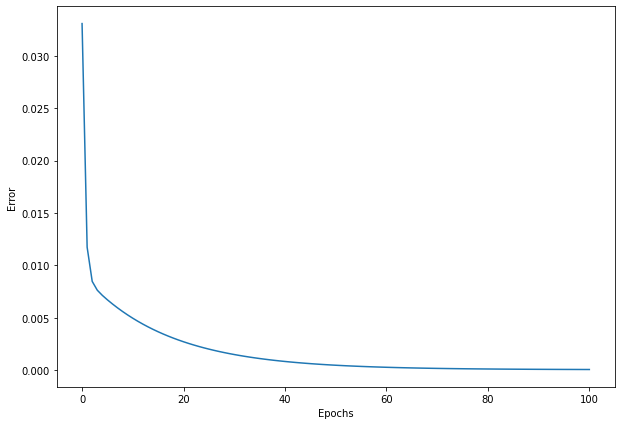

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 다항식

**샘플 데이터**를 생성합니다.

이번에는 Feature Data, 즉 X 값이 여러 개인 다항식의 경우에 대해서도 구해보도록 하겠습니다.

다항식에서는 X의 갯수 만큼, W 갯수도 늘어날 것입니다.

다만, bias (b)의 계수는 1개인 점에 유의해 주세요.

In [ ]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

**다항식을 정의**합니다.

In [ ]:
y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + 0.9

## Gradient Descent 구현 (다항식)

In [ ]:
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch=5000
learning_rate=0.5

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
w3 = np.random.uniform(low=0.0, high=1.0)

b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # 코드를 입력해 주세요
    y_hat = w1*x1+w2*x2+w3*x3+b

    # 코드를 입력해 주세요
    error = ((y_hat-y)**2).mean()
    if error < 0.00001:
        break

    # 코드를 입력해 주세요
    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * ((y_hat - y)*x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y)*x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y)*x3).mean()   


    b = b - learning_rate * (y_hat - y).mean()
    
    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))
    
print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

 0 w1 = 0.57601, w2 = 0.60500, w3 = 0.74950, b = 0.68301 error = 0.03843
 5 w1 = 0.52094, w2 = 0.58988, w3 = 0.75100, b = 0.70503 error = 0.00683
10 w1 = 0.48006, w2 = 0.58012, w3 = 0.75388, b = 0.73073 error = 0.00476
15 w1 = 0.44706, w2 = 0.57147, w3 = 0.75454, b = 0.75280 error = 0.00335
20 w1 = 0.42037, w2 = 0.56378, w3 = 0.75364, b = 0.77179 error = 0.00239
25 w1 = 0.39876, w2 = 0.55693, w3 = 0.75169, b = 0.78818 error = 0.00172
30 w1 = 0.38123, w2 = 0.55083, w3 = 0.74906, b = 0.80234 error = 0.00126
35 w1 = 0.36697, w2 = 0.54538, w3 = 0.74601, b = 0.81460 error = 0.00093
40 w1 = 0.35536, w2 = 0.54052, w3 = 0.74275, b = 0.82524 error = 0.00069
45 w1 = 0.34589, w2 = 0.53617, w3 = 0.73943, b = 0.83449 error = 0.00052
50 w1 = 0.33814, w2 = 0.53227, w3 = 0.73614, b = 0.84254 error = 0.00039
55 w1 = 0.33179, w2 = 0.52879, w3 = 0.73296, b = 0.84956 error = 0.00030
60 w1 = 0.32656, w2 = 0.52568, w3 = 0.72994, b = 0.85569 error = 0.00023
65 w1 = 0.32226, w2 = 0.52290, w3 = 0.72709, b = 0.

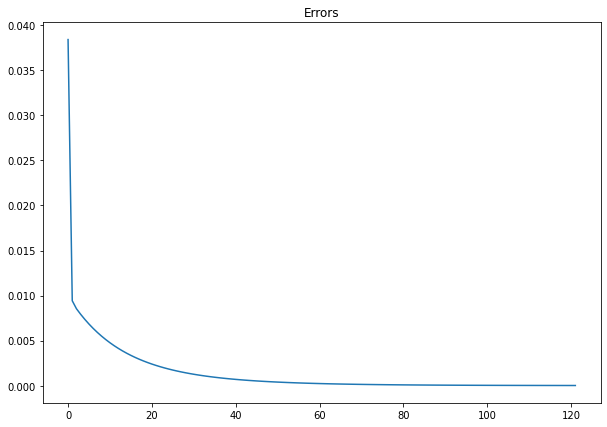

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.title('Errors')
plt.show()

## 가중치 (W1, W2, W3) 값들의 변화량 시각화

`Epoch`가 지남에 따라 어떻게 가중치들이 업데이트 되는지 시각화 해 봅니다.

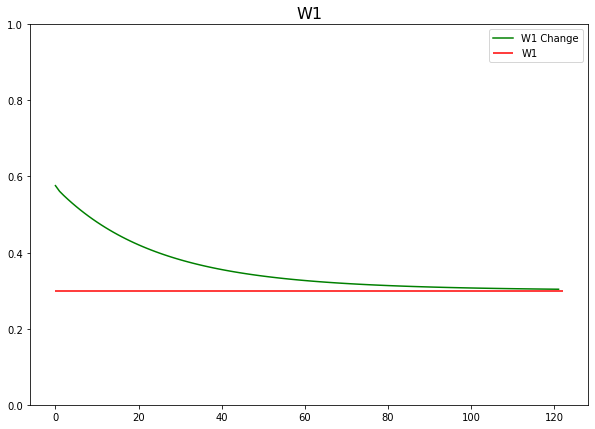

In [ ]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.3, xmin=0, xmax=len(w1_grad), color='r')
plt.plot(w1_grad, color='g')
plt.ylim(0, 1)
plt.title('W1', fontsize=16)
plt.legend(['W1 Change', 'W1'])
plt.show()

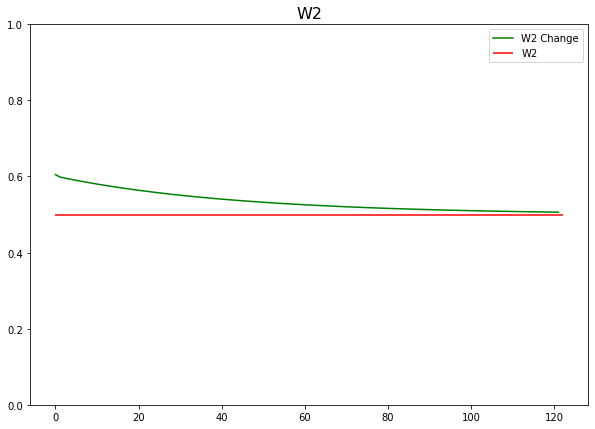

In [ ]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.5, xmin=0, xmax=len(w2_grad), color='r')
plt.plot(w2_grad, color='g')
plt.ylim(0, 1)
plt.title('W2', fontsize=16)
plt.legend(['W2 Change', 'W2'])
plt.show()

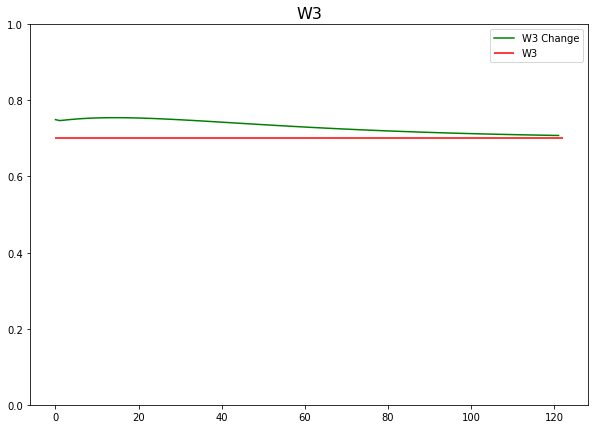

In [ ]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.7, xmin=0, xmax=len(w3_grad), color='r')
plt.plot(w3_grad, color='g')
plt.ylim(0, 1)
plt.title('W3', fontsize=16)
plt.legend(['W3 Change', 'W3'])
plt.show()